# Imports

In [1]:
from utility import *

# Data Interpretation

In [10]:
df = get_data()
df, _, _, _, _ = preprocess_data(df)
df = df[df['Trial'].isin(np.arange(1, 20, 1))]


p3 confidence interval figure saved as P3_confidence_interval.pdf


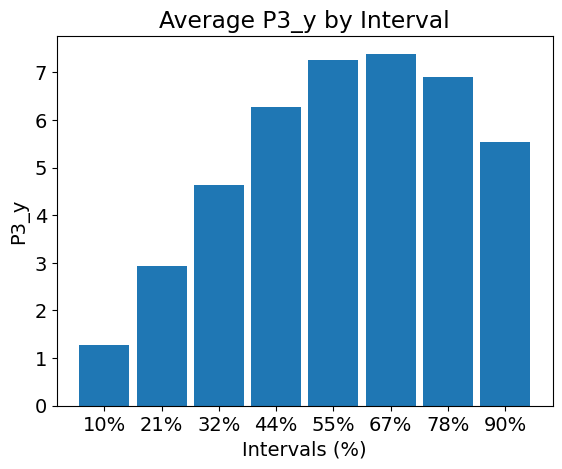

Shapiro-Wilk Test for Normality of P3_y Data
10%:
W = 0.9623
p = 0.0000
21%:
W = 0.9805
p = 0.0070
32%:
W = 0.9917
p = 0.3130
44%:
W = 0.9845
p = 0.0271
55%:
W = 0.9761
p = 0.0017
67%:
W = 0.9634
p = 0.0000
78%:
W = 0.9804
p = 0.0068
90%:
W = 0.9685
p = 0.0002


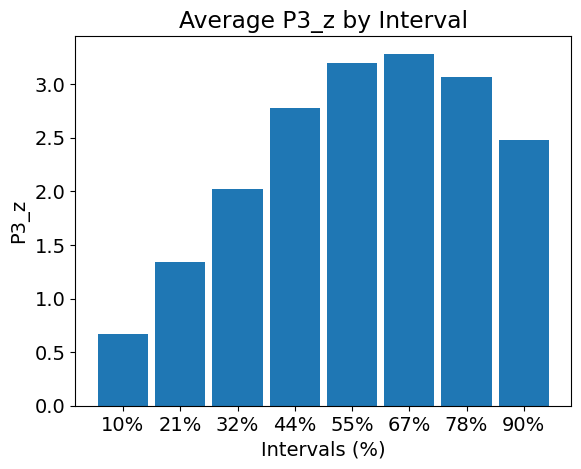

Shapiro-Wilk Test for Normality of P3_z Data
10%:
W = 0.9888
p = 0.1202
21%:
W = 0.9796
p = 0.0052
32%:
W = 0.9866
p = 0.0562
44%:
W = 0.9903
p = 0.1975
55%:
W = 0.9769
p = 0.0022
67%:
W = 0.9845
p = 0.0273
78%:
W = 0.9811
p = 0.0084
90%:
W = 0.9823
p = 0.0127


In [5]:
interval = np.linspace(0.1, 0.9, 8)

y_intervals = plot_histogram(intervals=interval, coord='P3_y')
z_intervals = plot_histogram(intervals=interval, coord='P3_z')

# Preprocessing & Training Singular Model

In [2]:
df = get_data()
df, p3_y_min, p3_y_max, p3_z_min, p3_z_max = preprocess_data(df)
X_train, X_val, X_test, y_train, y_val, y_test, trial_lengths, health_shoe_params = train_test_split(df)
model = NeuralNet(X_train.shape[1], y_train.shape[1])
model = torch.nn.DataParallel(model)
train_neural_network(model, X_train, y_train, X_val, y_val)

Number of (isLaminitic, Shoe) combinations per set:
Training Set: --------------------------------------------------
({'isLaminitic': True, 'Shoe': 'Eggbar'}) : 16
({'isLaminitic': True, 'Shoe': 'Unshod'}) : 13
({'isLaminitic': False, 'Shoe': 'Heartbar'}) : 15
({'isLaminitic': True, 'Shoe': 'Standard'}) : 16
({'isLaminitic': False, 'Shoe': 'Unshod'}) : 15
({'isLaminitic': False, 'Shoe': 'Standard'}) : 15
({'isLaminitic': False, 'Shoe': 'Eggbar'}) : 20
({'isLaminitic': True, 'Shoe': 'Heartbar'}) : 16
Validation Set: --------------------------------------------------
({'isLaminitic': True, 'Shoe': 'Eggbar'}) : 6
({'isLaminitic': True, 'Shoe': 'Unshod'}) : 5
({'isLaminitic': False, 'Shoe': 'Heartbar'}) : 6
({'isLaminitic': True, 'Shoe': 'Standard'}) : 6
({'isLaminitic': False, 'Shoe': 'Unshod'}) : 6
({'isLaminitic': False, 'Shoe': 'Standard'}) : 6
({'isLaminitic': False, 'Shoe': 'Eggbar'}) : 7
({'isLaminitic': True, 'Shoe': 'Heartbar'}) : 6
Testing Set: -----------------------------------

# Visualize Results

In [3]:
plot_model_results_to_pdf(model, X_test, y_test,
                          health_shoe_params, trial_lengths, p3_y_min, p3_y_max, p3_z_min, p3_z_max)

Accuracy of Predictions for P3 Model
Inputs = dwy, dwz, smy, smz, cby, cbz
R² = 0.9698
MSE = 0.0023


# Cross Validation

In [4]:
df = get_data()
df = preprocess_data(df)
cross_validation(df)

Performing 5 Cross Validation ==================================================
Processing fold 1...
Fold 1: R2 = 0.9542581981925331, MSE = 0.0038268882781267166
Processing fold 2...
Fold 2: R2 = 0.9104955550410492, MSE = 0.007213545497506857
Processing fold 3...
Fold 3: R2 = 0.939349897663193, MSE = 0.005646520294249058
Processing fold 4...
Fold 4: R2 = 0.9791609820146749, MSE = 0.001837011892348528
Processing fold 5...
Fold 5: R2 = 0.9703786479047407, MSE = 0.0027697402983903885

Average R²: 0.9507
Average MSE: 0.0043


# Plotting Preprocessing Steps

In [5]:
df = get_data()
df = interpolate(df)
df = remove_bad_trials(df)
df = translate_data_to_zero(df)
df = normalize(df)
plot_all_coords_to_pdf(df, use_suggest_cutoff=True, pdf_name='visualize_all_coords_cutoff.pdf')

All coordinates figure saved as visualize_all_coords_cutoff.pdf


In [6]:
df = get_data()
df = preprocess_data(df)
plot_all_coords_to_pdf(df, use_suggest_cutoff=False,
                       pdf_name='visualize_all_coords_after_cutoff.pdf')

All coordinates figure saved as visualize_all_coords_after_cutoff.pdf


In [7]:
df = get_data()
df = df[df['Trial'] == 1]
plot_preprocessing_steps_to_pdf(df)

Preprocessing steps figure saved as preprocessing_steps.pdf


In [8]:
plot_model()

In [9]:
df = get_data()
plot_all_coords_to_pdf(df, coord_sets=['P3'], colors=['purple'], pdf_name='p3_yz_before_processing.pdf')
df = preprocess_data(df)
plot_all_coords_to_pdf(df, coord_sets=['P3'], colors=['purple'], pdf_name='p3_yz_after_processing.pdf')

P3_yz figure saved as p3_yz_before_processing.pdf
P3_yz figure saved as p3_yz_after_processing.pdf
